<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#使用-Tensorflow-构建第一个神经网络" data-toc-modified-id="使用-Tensorflow-构建第一个神经网络-1">使用 Tensorflow 构建第一个神经网络</a></span><ul class="toc-item"><li><span><a href="#1.-导入-Keras" data-toc-modified-id="1.-导入-Keras-1.1">1. 导入 Keras</a></span></li><li><span><a href="#2.-训练第一个神经网络:-基本分类器" data-toc-modified-id="2.-训练第一个神经网络:-基本分类器-1.2">2. 训练第一个神经网络: 基本分类器</a></span><ul class="toc-item"><li><span><a href="#2.1-导入-Fashion-MNIST-数据集" data-toc-modified-id="2.1-导入-Fashion-MNIST-数据集-1.2.1">2.1 导入 Fashion MNIST 数据集</a></span></li><li><span><a href="#2.2-预处理数据" data-toc-modified-id="2.2-预处理数据-1.2.2">2.2 预处理数据</a></span></li><li><span><a href="#2.3-构建模型" data-toc-modified-id="2.3-构建模型-1.2.3">2.3 构建模型</a></span></li><li><span><a href="#2.4-编译模型" data-toc-modified-id="2.4-编译模型-1.2.4">2.4 编译模型</a></span></li><li><span><a href="#2.5-训练模型" data-toc-modified-id="2.5-训练模型-1.2.5">2.5 训练模型</a></span></li><li><span><a href="#2.6-评估准确率" data-toc-modified-id="2.6-评估准确率-1.2.6">2.6 评估准确率</a></span></li><li><span><a href="#2.7-使用模型预测" data-toc-modified-id="2.7-使用模型预测-1.2.7">2.7 使用模型预测</a></span></li></ul></li></ul></li></ul></div>

# 使用 Tensorflow 构建第一个神经网络

这里我们使用 `Keras` 搭建神经网络. `Keras` 是 `Tensorflow` 中的一个用于构建和训练深度学习模型的高阶 API。它可用于快速设计原型、高级研究和生产.

## 1. 导入 Keras
注意我们使用的是 `Tensorflow` 中的 `Keras`, 它来源于 `Python` 一个独立的 `Keras` 包, 绝大部分API的功能相同, 但不完全兼容. 同时我们也导入 `numpy` 多维数组库和 `matplotlib` 绘图库.

In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.VERSION)
print(tf.keras.__version__)

import numpy as np
import matplotlib.pyplot as plt

1.13.1
2.2.4-tf


## 2. 训练第一个神经网络: 基本分类器

### 2.1 导入 Fashion MNIST 数据集
本指南使用 Fashion MNIST 数据集，其中包含 70000 张灰度图像，涵盖 10 个类别。以下图像显示了单件服饰在较低分辨率（28x28 像素）下的效果：

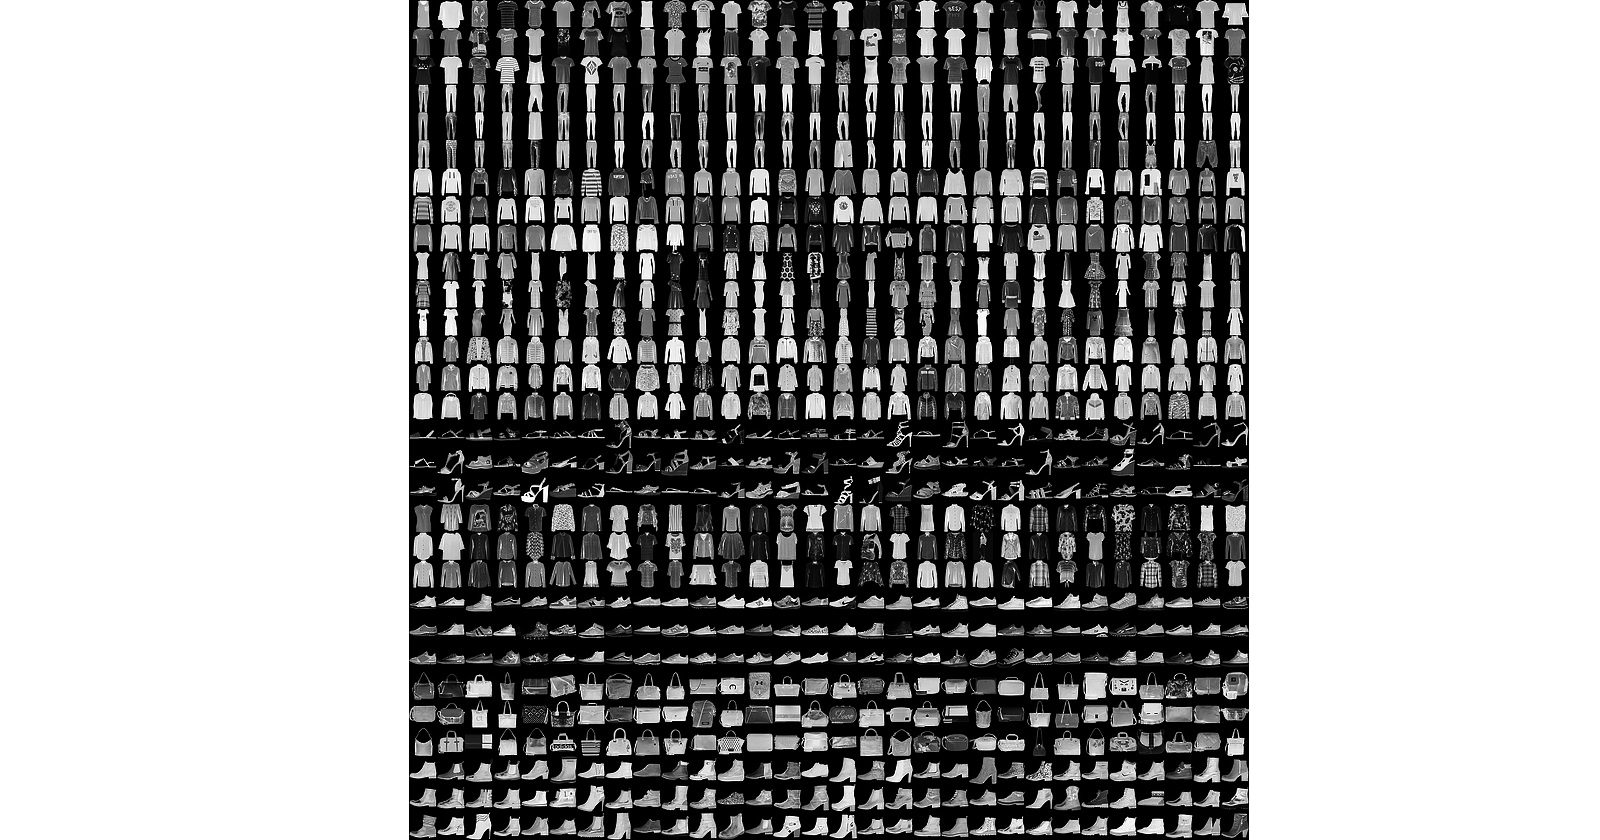

我们使用 Fashion MNIST 实现多样化，并且它比常规 MNIST 更具挑战性。这两个数据集都相对较小，用于验证某个算法能否如期正常运行。它们都是测试和调试代码的良好起点。

我们将使用 60000 张图像训练网络，并使用 10000 张图像评估经过学习的网络分类图像的准确率。我们可以从 TensorFlow 直接访问 Fashion MNIST，只需导入和加载数据即可(在线下载, 也可选择手动下载, 放入目录 `~/.kears/.keras/datasets/fashion-mnist`, Windows 用户的 `~` 表示 `C:/Users/<YourName>`)：

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

`load_data` 会返回 4 个 NumPy 数组：
* `train_images` 和 `train_labels` 数组是训练集，即模型用于学习的数据。
* `test_images` 和 `test_labels` 数组是测试集, 用于测试模型。
图像为 28x28 的 NumPy 数组，像素值介于 0 到 255 之间。标签是整数数组，介于 0 到 9 之间。这些标签对应于图像代表的服饰所属的类别：

|标签 | 类别 |
|:--:|:--:|
|0|	T 恤衫/上衣|
|1|	裤子|
|2|	套衫|
|3|	裙子|
|4|	外套|
|5|	凉鞋|
|6|	衬衫|
|7|	运动鞋|
|8|	包包|
|9|	踝靴|

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

查看数据格式

In [7]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


训练集有 60000 张图像, 大小为 $28\times 28$, 每张图像对应一个标签, 为 0~9 的数字; 测试集有 10000 张.

### 2.2 预处理数据

首先查看第一张图片

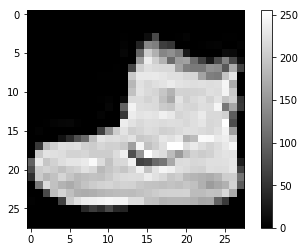

In [9]:
plt.figure()
plt.imshow(train_images[0], cmap="gray")
plt.colorbar()
plt.grid(False)

我们将这些值缩小到 [0, 1] 之间，然后将其馈送到神经网络模型。为此，将图像组件的数据类型从整数转换为浮点数，然后除以 255。以下是预处理图像的函. 务必要以相同的方式对训练集和测试集进行预处理：

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

显示训练集中的前 25 张图像，并在每张图像下显示类别名称。验证确保数据格式正确无误，然后我们就可以开始构建和训练网络了。

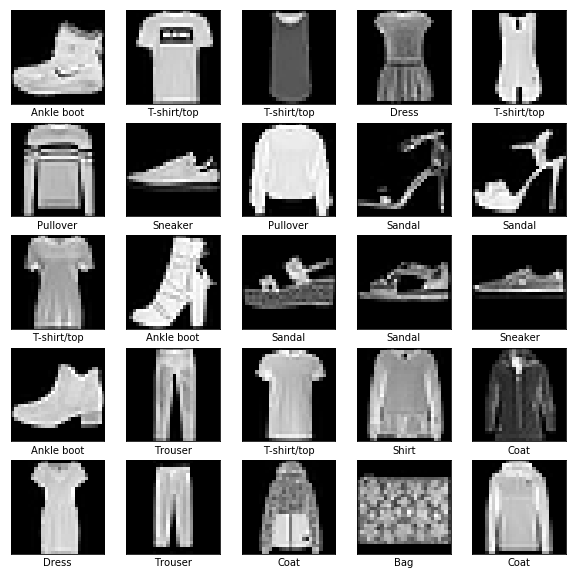

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap="gray")
    plt.xlabel(class_names[train_labels[i]])

### 2.3 构建模型

神经网络的基本构造块是层。层从输入到其中的数据中提取特征并输入到下一层。大部分深度学习模型都会把简单的层连在一起。大部分网络层（例如 `tf.keras.layers.Dense`）都具有在训练期间要学习的参数。

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


该网络中的第一层 `tf.keras.layers.Flatten` 将图像格式从二维数组（28x28 像素）转换成一维数组（$28 \times 28 = 784$ 像素）。可以将该层视为图像中像素展平的一行。该层没有要学习的参数；它只修改了数据的形状。该网络包含两个 `tf.keras.layers.Dense` 层的序列。这些层是密集连接或全连接神经层。第一个 `Dense` 层具有 128 个节点（或神经元）。第二个（也是最后一个）层是具有 10 个节点的 `softmax` 层，该层会返回一个具有 10 个概率得分的数组，这些得分的总和为 1。每个节点包含一个得分，表示当前图像属于 10 个类别中某一个的概率。

### 2.4 编译模型

模型还需要再进行几项设置才可以开始训练。这些设置会添加到模型的编译步骤：
* **损失函数** - 衡量模型在训练期间的准确率。我们希望尽可能缩小该函数，以“引导”模型朝着正确的方向优化. 这里我们使用**交叉熵**损失函数:
  $$
  \text{loss} = y_i\log\hat{y}_i + (1-y_i)\log(1-\hat{y}_i)
  $$
  其中 $y_i$ 表示正确的标签, $\hat{y}_i$ 表示模型预测的 [0, 1] 之间的值.
* **优化器** - 根据模型看到的数据及其损失函数更新模型的方式。
* **指标** - 用于监控训练和测试步骤。以下示例使用准确率，即图像被正确分类的比例。

In [16]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 2.5 训练模型

训练神经网络模型需要执行以下步骤：
* 将训练数据馈送到模型中，在本示例中为 `train_images` 和 `train_labels` 数组。
* 模型学习将图像与标签相关联。
* 我们要求模型对测试集进行预测，在本示例中为 `test_images` 数组。我们会验证预测结果是否与 `test_labels` 数组中的标签一致。
调用 `model.fit` 方法开始训练，使模型与训练数据“拟合”：

In [17]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5014 - acc: 0.8240
Epoch 2/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3765 - acc: 0.8637
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3388 - acc: 0.8770
Epoch 4/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3128 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2961 - acc: 0.8910


在模型训练期间，系统会显示损失和准确率指标。该模型在训练数据上的准确率达到 0.89（即 89%）。

### 2.6 评估准确率

接下来，比较一下模型在测试数据集上的表现：

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3446 - acc: 0.8744
Test accuracy: 0.8744


结果表明，模型在测试数据集上的准确率略低于在训练数据集上的准确率。训练准确率和测试准确率之间的这种差异表示出现过拟合。如果机器学习模型在新数据上的表现不如在训练数据上的表现，就表示出现过拟合。

### 2.7 使用模型预测

模型经过训练后，我们可以使用它对一些图像进行预测。

In [20]:
predictions = model.predict(test_images)

在本示例中，模型已经预测了测试集中每张图像的标签。我们来看看第一个预测：

In [21]:
predictions[0]

array([1.9432415e-05, 2.6733028e-07, 1.8995391e-07, 1.1573023e-07,
       1.9211507e-06, 7.6022707e-03, 9.9857300e-07, 2.2498216e-02,
       3.6445074e-06, 9.6987301e-01], dtype=float32)

预测结果是一个具有 10 个数字的数组。这些数字说明模型对于图像对应于 10 种不同服饰中每一个服饰的“置信度”。我们可以看到哪个标签的置信度值最大：

In [22]:
np.argmax(predictions[0])

9

因此，模型非常确信这张图像是踝靴或属于 `class_names[9]`。我们可以检查测试标签以查看该预测是否正确：

In [23]:
test_labels[0]

9

看起来测试集第一张图片预测的是正确的. 我们可以将该预测绘制成图来查看全部 10 个通道

In [24]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap="gray")
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

我们来看看第 0 张图像、预测和预测数组。

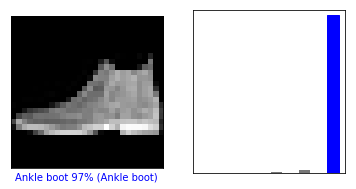

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

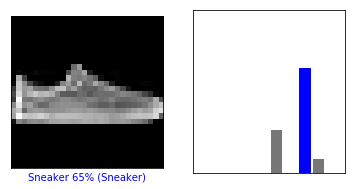

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

我们用它们的预测绘制几张图像。正确的预测标签为蓝色，错误的预测标签为红色。数字表示预测标签的百分比（总计为 100）。请注意，即使置信度非常高，也有可能预测错误。

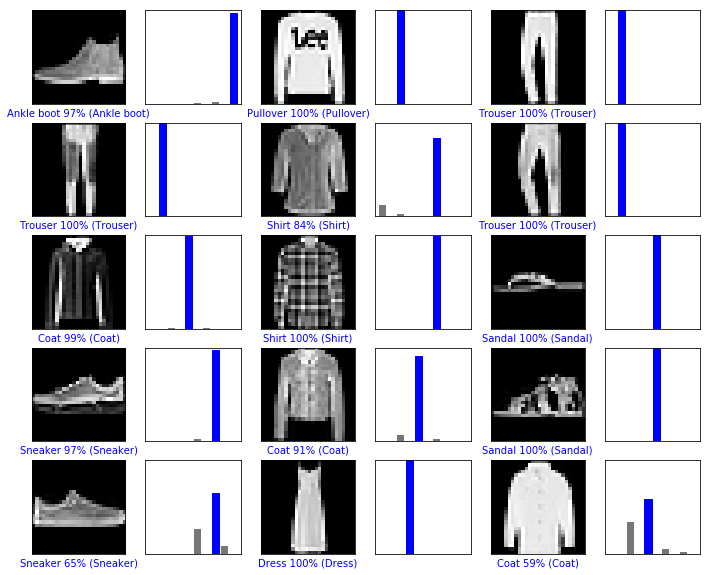

In [27]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

现在我们已经成功训练了第一个神经网络, 并在测试集上做了测试, 还进行了一些预测和预测结果的探讨. 下一节我们尝试增加隐藏层的数量并增加神经元的数量以求提升分类的精度.